In [1]:
import torch
import sklearn
from skimage import io
import numpy as np
import random as rd
import os
from torch.utils.data import Dataset
from torch.utils import data
from torch import nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torchvision
from torchvision import transforms
import cv2
import dlib
import math
#device='cpu'
device = 'cuda' if torch.cuda.is_available() else 'cpu'
batch_size = 32
seed = 10
epochs = 12
def setup_seeds(seed=10):
    torch.manual_seed(seed)
    np.random.seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    rd.seed(seed)
setup_seeds(seed)

In [2]:
train_data_path = '~/cwl/code/rgb_set'
img_data = torchvision.datasets.ImageFolder(train_data_path,transform=(transforms.ToTensor()))#,transform=transforms.Compose([transforms.Resize(256),
                                                                                    #transforms.CenterCrop(224),
                                                                                   #transforms.ToTensor()]))
data_loader = torch.utils.data.DataLoader(img_data, batch_size=2000, shuffle=False)


0
torch.Size([2000, 3, 250, 250]) torch.Size([2000])


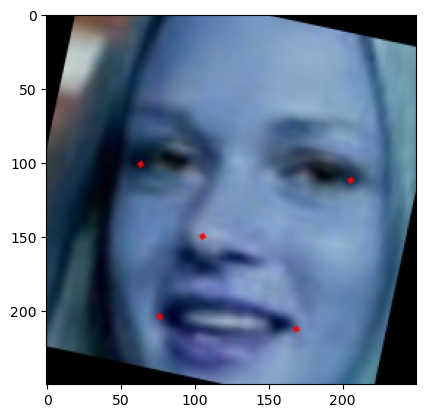

In [3]:
for step, (x, y) in enumerate(data_loader):
    print(step)
    print(x.shape, y.shape)
    plt.imshow(x[0].permute(1, 2, 0).numpy())
    break

In [13]:
try_batchs = [1, 2, 3, 4, 5, 6, 7]

In [14]:
face_recognizer = cv2.face.LBPHFaceRecognizer_create()
for step,(x, y) in enumerate(data_loader):
    print(step)
    x = x.permute(0, 2, 3, 1).numpy()
    y = y.numpy()
    face_recognizer.train(0.299*x[:,:,:,0]+0.587*x[:,:,:,1]+0.114*x[:,:,:,2], y)
    face_recognizer.write('./lbp{}.yml'.format(step+1))

0
1
2
3
4
5
6


0
1
1  total:2000,error:0,acc1.0,not_confident:0
0
1
2
2  total:4000,error:1870,acc0.5325,not_confident:2
0
1
2
3
3  total:6000,error:4000,acc0.33333333333333337,not_confident:2
0
1
2
3
4
4  total:8000,error:5993,acc0.25087499999999996,not_confident:2
0
1
2
3
4
5
5  total:10000,error:8001,acc0.19989999999999997,not_confident:3
0
1
2
3
4
5
6
6  total:12000,error:10000,acc0.16666666666666663,not_confident:6
0
1
2
3
4
5
6
7  total:12448,error:11999,acc0.036070051413881754,not_confident:23


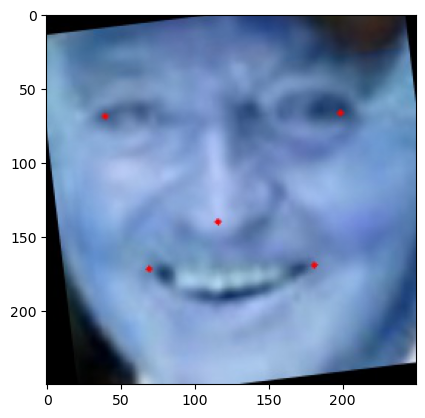

In [18]:
for try_batch in try_batchs:
    face_recognizer = cv2.face.LBPHFaceRecognizer_create()
    face_recognizer.read('./lbp{}.yml'.format(try_batch))
    error = 0
    total = 0
    not_confident = 0
    for step, (x, y) in enumerate(data_loader):
        print(step)
        if step==try_batch:
            break
        x = x.permute(0, 2, 3, 1).numpy()
        y = y.numpy()
        for i in range(len(y)):
            y_predict, confidence = face_recognizer.predict(0.299*x[i,:,:,0]+0.587*x[i,:,:,1]+0.114*x[i,:,:,2])
            #print(y[i], y_predict)
            plt.imshow(x[i])
            error = error + 1-(y[i]==y_predict)
            if confidence>80:
                not_confident = not_confident + 1
            #break
        total = total + len(y)
    print('{}  total:{},error:{},acc{},not_confident:{}'.format(try_batch, total, error, 1.-1.*error/total, not_confident))
